# Application of the PFR model to streams 

## EX 9.3 Point source into a plug-flow system

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('axes', labelsize=20) 

In [8]:
Qr = 12e6  # river flow, m^3/d
Qw = 0.5e6 # water flow, m^3/d
Cr = 1   # concentration in the river, mg/L
Cw = 400 # concentration in the waste, mg/L

k = 0.8 # reaction rate, /d
Ac = 2000 # cross section area, m^2

In [9]:
# initial concentration from the point source
C0 = (Qr*Cr + Qw*Cw)/(Qr + Qw)
U = (Qr + Qw)/Ac

Text(0, 0.5, 'Concentration (mg/L)')

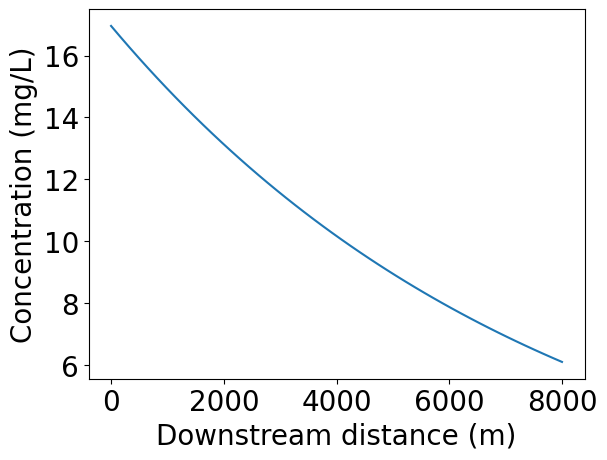

In [10]:
# PFR solution for point source pollution
x = np.linspace(0,8000)
C = C0 * np.exp(-k/U * x)

plt.figure
plt.plot(x,C)
plt.xlabel('Downstream distance (m)')
plt.ylabel('Concentration (mg/L)')

## EX 9.4 Distributed source into a plug-flow system

Text(0, 0.5, 'Concentration (mg/L)')

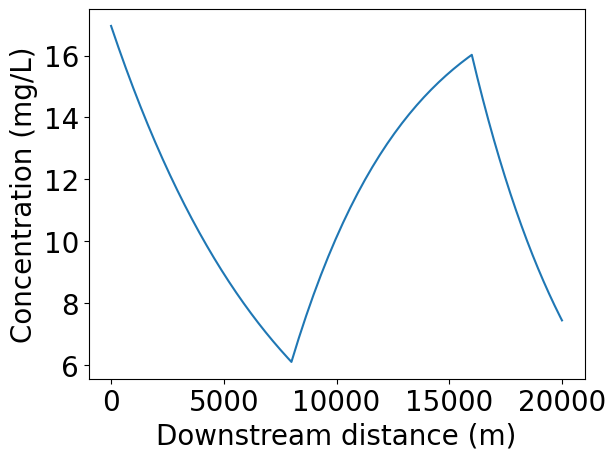

In [11]:
Sd = 15 # diffuse source, mg/(L d)
Ac2 = 3000 # new cross section area after 8 km

x1 = np.linspace(0,8000)
x2 = np.linspace(8000,16000)
x3 = np.linspace(16000,20000)

# 0 - 8 km
C1 = C0 * np.exp(-k/U * x1)

U2 = (Qr+Qw)/Ac2

# 8 - 16 km
C2 = C1[-1]*np.exp(-k/U2*(x2-x1[-1])) + Sd/k * (1 - np.exp(-k/U2*(x2-x1[-1])))

# >16 km
C3 = C2[-1]*np.exp(-k/U2*(x3-x2[-1]))

x = np.hstack((x1, x2, x3))
C = np.hstack((C1, C2, C3))
plt.figure
plt.plot(x,C)
plt.xlabel('Downstream distance (m)')
plt.ylabel('Concentration (mg/L)')